In [6]:
import numpy as np
import pandas as pd
from copy import deepcopy           # Necessário para copiar os dados dentro de funções e evitar alterações inplace dos dados
                                    # Isso para que as funções recebam um dado e gerem um dado novo, mantendo o original inalterado.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [7]:
from preprocessor import Preprocessor

In [8]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression

In [10]:
# Importação dos dados
DATA_PATH = '../dados/dados_treino.csv'
prep = Preprocessor(DATA_PATH)

# Processamento e adequação do dataset
prep.preprocess_dataset()

# Escolha do usuário para treinamento / análise
USER = '#ID9181'
user_data = prep.get_user_data(USER)

# Separação do dataset de treino e teste
X_train, X_test, y_train, y_test = prep.train_test_split(user_data, oversampling="SMOTENC")

#  <<<<<< Aplicar métodos de aprendizado de máquina >>>>>>>

# clf = svm.SVC(kernel='linear') # Linear Kernel
clf = Perceptron()
# clf.fit(X_train, y_train) # Sem SMOTE
clf.fit(X_train, y_train)  # Com SMOTE

y_pred = clf.predict(X_test)

from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Usuarios: ['#ID4940', '#ID9181']
Labels shape: (2403,)
Features shape(2403, 43)
with SMOTENC oversampling
Accuracy: 0.14137214137214138
Precision: 0.14137214137214138
Recall: 1.0


>svm1 0.855 (0.035)
>svm2 0.859 (0.034)
>svm3 0.890 (0.035)
>svm4 0.808 (0.037)
>svm5 0.850 (0.037)
>soft_voting 0.922 (0.027)


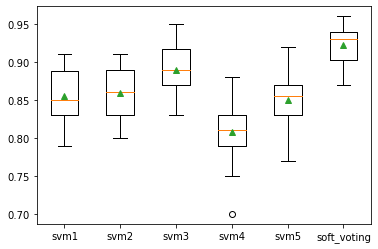

In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
	return X, y
 
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
	models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
	models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
	models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
	models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='soft')
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
	models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
	models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
	models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
	models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
	models['soft_voting'] = get_voting()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()